Results for GNP model, Fashion pose database

In [1]:
# The purpose of this is for the visualized figures to be inline the browser
%matplotlib inline

# Import stuff from menpo
import menpo.io as mio
from menpo.feature import no_op, dsift, fast_dsift, double_igo
from menpo.visualize import visualize_images, visualize_pointclouds, print_dynamic, print_progress
from menpo.landmark import labeller, human36M_pose_32, human36M_pose_17

# Import stuff from menpofit
from menpofit.visualize import visualize_shape_model, visualize_fitting_result, plot_ced

# Import stuff from alabortijcv2015 (this will be soon integrated in menpofit)
from alabortijcv2015.aam import PartsAAMBuilder, PartsAAMFitter
from alabortijcv2015.aam.algorithm import SIC, BSC
from alabortijcv2015.utils import pickle_load, pickle_dump
from alabortijcv2015.result import SerializableResult

# Other stuff
import numpy as np
import re
from itertools import islice
save_path='/vol/atlas/homes/mej114/results'

:0: FutureWarning: IPython widgets are experimental and may change in the future.
/vol/atlas/homes/mej114/yes/envs/menpo/lib/python2.7/site-packages/skimage/filter/__init__.py:6: skimage_deprecation: The `skimage.filter` module has been renamed to `skimage.filters`.  This placeholder module will be removed in v0.13.
  warn(skimage_deprecation('The `skimage.filter` module has been renamed '


In [34]:
 def compute_error_custom_part(pointcloud1,pointcloud2):
        import math
        from menpo.shape import PointUndirectedGraph
              
    
        b=pointcloud1.lms.bounding_box().points
 
        x=b[1][0]-b[0][0]
        y=b[1][1]-b[3][1]
        norm=math.sqrt(x*x+y*y)
       
        return np.mean(np.sqrt(np.sum((pointcloud1.lms.points-pointcloud2.lms.points)**2,axis=-1)))/norm

left leg

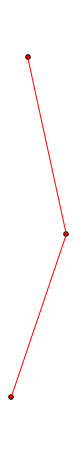

In [2]:
aam = pickle_load(save_path + 'PartsAAM_fast_dsiftleft_legFashionPose.pickle')
visualize_shape_model(aam.shape_models)
                 

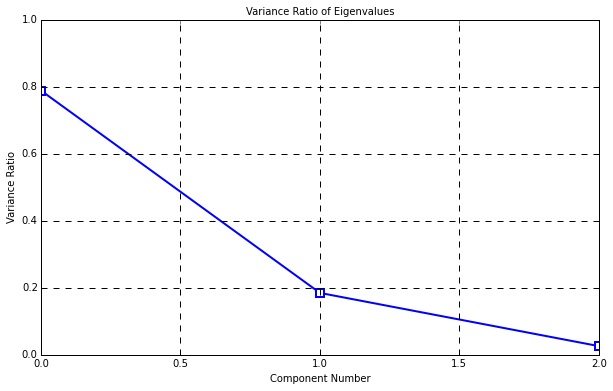

In [3]:
aam.shape_models[1].plot_eigenvalues_ratio_widget()

In [4]:
fitter_results=pickle_load(save_path+ 'PartsAAM_fast_dsift_noiseNoneleft_legFittedFashionPose.pickle')

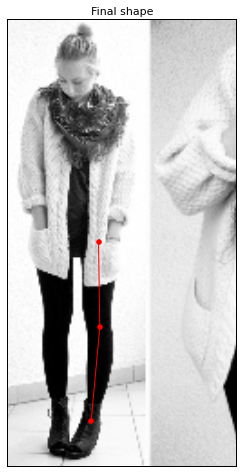

In [5]:
visualize_fitting_result(fitter_results)

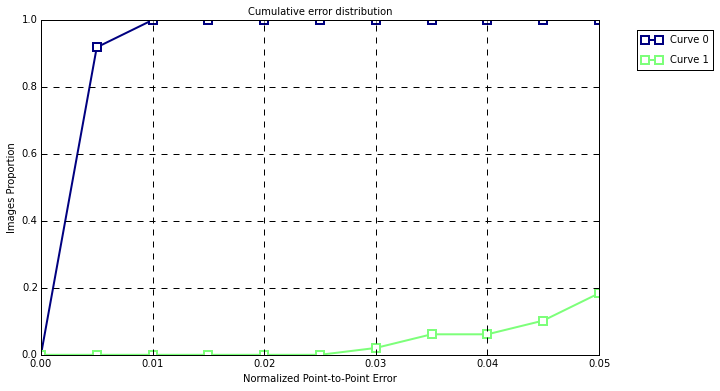

In [6]:
error_type = 'me_norm' #'me_norm', or 'me' or 'rmse'

initial_errors = [fr.initial_error(error_type=error_type) for fr in fitter_results]
final_errors = [fr.final_error(error_type=error_type) for fr in fitter_results]

plot_ced([initial_errors, final_errors])

In [7]:
print("               |  mean  | median |  std  ")
print("Initialization | {:1.4f} | {:1.4f} | {:1.4f}".format(np.mean(initial_errors), 
                                                            np.median(initial_errors),
                                                            np.std(initial_errors)))
print("Fitting result | {:1.4f} | {:1.4f} | {:1.4f}".format(np.mean(final_errors), 
                                                            np.median(final_errors),
                                                            np.std(final_errors)))

               |  mean  | median |  std  
Initialization | 0.0044 | 0.0045 | 0.0005
Fitting result | 0.0742 | 0.0697 | 0.0268


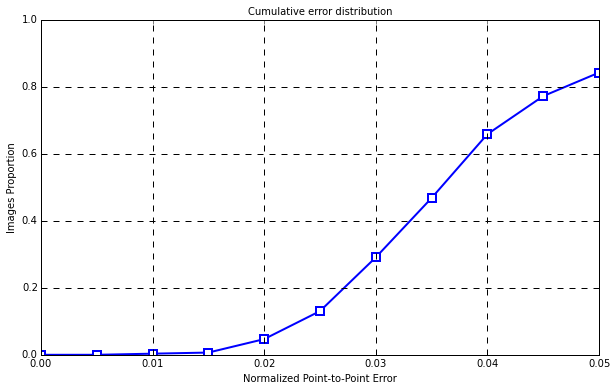

In [36]:
error=[]
for im in fitter_results:
    m=im.fitted_image.landmarks['ground']
    n=im.fitted_image.landmarks['final']
    distance=compute_error_custom_part(m,n)
    error.append(distance)
plot_ced(error)

In [37]:
print("               |  mean  | median |  std  ")

print("Fitting result | {:1.4f} | {:1.4f} | {:1.4f}".format(np.mean(error), 
                                                            np.median(error),
                                                            np.std(error)))

               |  mean  | median |  std  
Fitting result | 0.0382 | 0.0357 | 0.0152


right leg


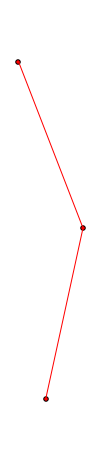

In [9]:
aam = pickle_load(save_path + 'PartsAAM_fast_dsiftright_legFashionPose.pickle')
visualize_shape_model(aam.shape_models)
                 

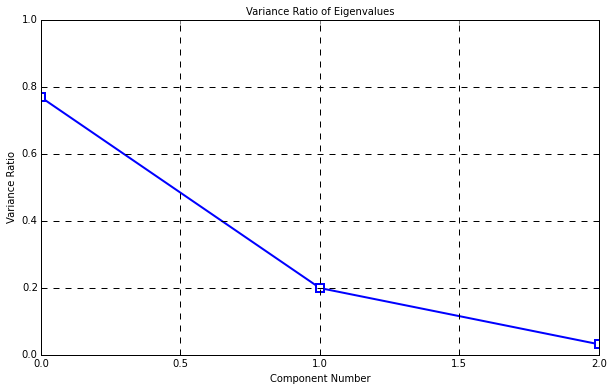

In [12]:
aam.shape_models[1].plot_eigenvalues_ratio_widget()

In [38]:
fitter_results=pickle_load(save_path+ 'PartsAAM_fast_dsift_noiseNoneright_legFittedFashionPose.pickle')

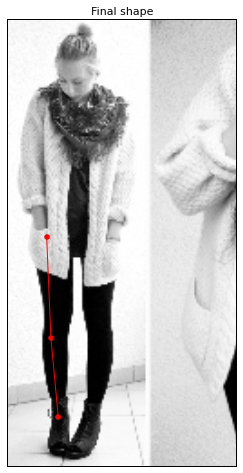

In [39]:
visualize_fitting_result(fitter_results)

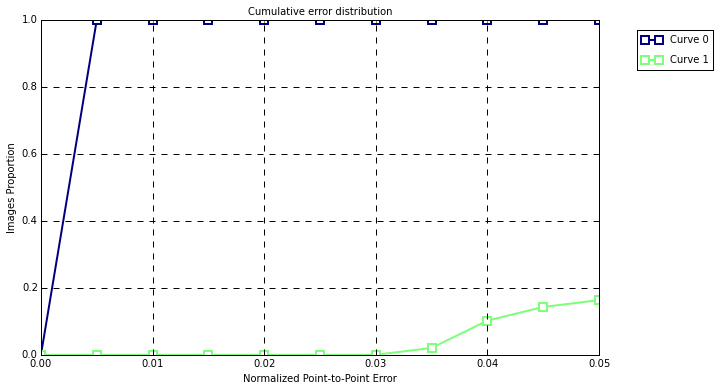

In [19]:
error_type = 'me_norm' #'me_norm', or 'me' or 'rmse'

initial_errors = [fr.initial_error(error_type=error_type) for fr in fitter_results]
final_errors = [fr.final_error(error_type=error_type) for fr in fitter_results]

plot_ced([initial_errors, final_errors])

In [20]:
print("               |  mean  | median |  std  ")
print("Initialization | {:1.4f} | {:1.4f} | {:1.4f}".format(np.mean(initial_errors), 
                                                            np.median(initial_errors),
                                                            np.std(initial_errors)))
print("Fitting result | {:1.4f} | {:1.4f} | {:1.4f}".format(np.mean(final_errors), 
                                                            np.median(final_errors),
                                                            np.std(final_errors)))

               |  mean  | median |  std  
Initialization | 0.0040 | 0.0041 | 0.0004
Fitting result | 0.0690 | 0.0682 | 0.0205


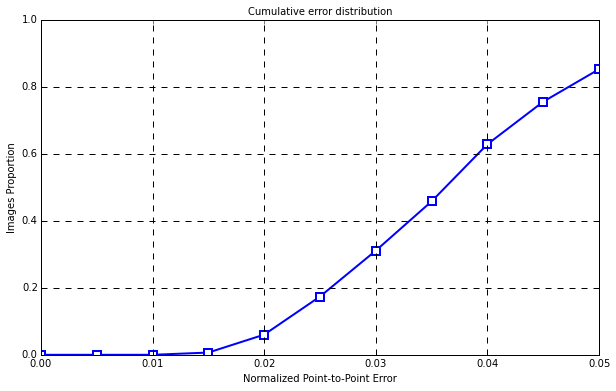

In [40]:
error=[]
for im in fitter_results:
    m=im.fitted_image.landmarks['ground']
    n=im.fitted_image.landmarks['final']
    distance=compute_error_custom_part(m,n)
    error.append(distance)
plot_ced(error)

In [41]:
print("               |  mean  | median |  std  ")

print("Fitting result | {:1.4f} | {:1.4f} | {:1.4f}".format(np.mean(error), 
                                                            np.median(error),
                                                            np.std(error)))

               |  mean  | median |  std  
Fitting result | 0.0376 | 0.0360 | 0.0143


left arm

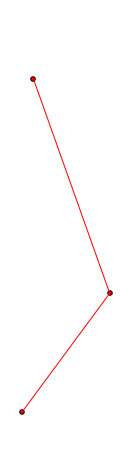

In [12]:
aam = pickle_load(save_path + 'PartsAAM_fast_dsiftleft_armFashionPose.pickle')
visualize_shape_model(aam.shape_models)
                 

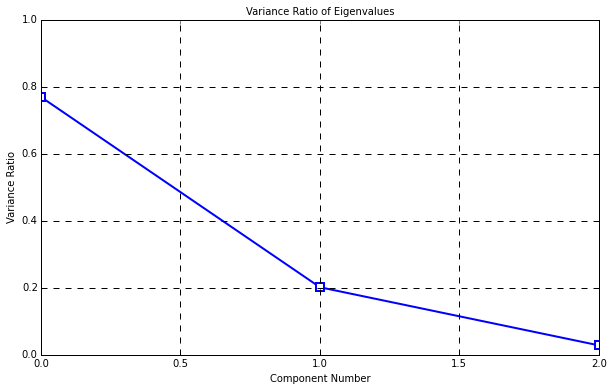

In [24]:
aam.shape_models[1].plot_eigenvalues_ratio_widget()

In [42]:
fitter_results=pickle_load(save_path+ 'PartsAAM_fast_dsift_noiseNoneleft_armFittedFashionPose.pickle')

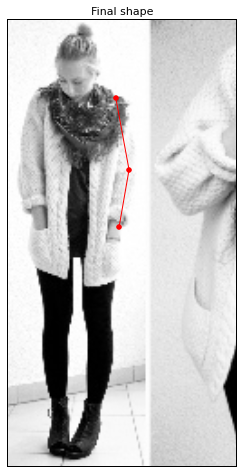

In [43]:
visualize_fitting_result(fitter_results)

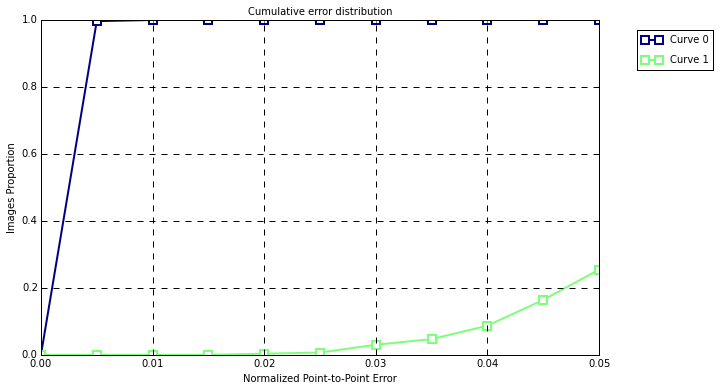

In [44]:
error_type = 'me_norm' #'me_norm', or 'me' or 'rmse'

initial_errors = [fr.initial_error(error_type=error_type) for fr in fitter_results]
final_errors = [fr.final_error(error_type=error_type) for fr in fitter_results]

plot_ced([initial_errors, final_errors])

In [45]:
print("               |  mean  | median |  std  ")
print("Initialization | {:1.4f} | {:1.4f} | {:1.4f}".format(np.mean(initial_errors), 
                                                            np.median(initial_errors),
                                                            np.std(initial_errors)))
print("Fitting result | {:1.4f} | {:1.4f} | {:1.4f}".format(np.mean(final_errors), 
                                                            np.median(final_errors),
                                                            np.std(final_errors)))

               |  mean  | median |  std  
Initialization | 0.0034 | 0.0034 | 0.0006
Fitting result | 0.0696 | 0.0642 | 0.0316


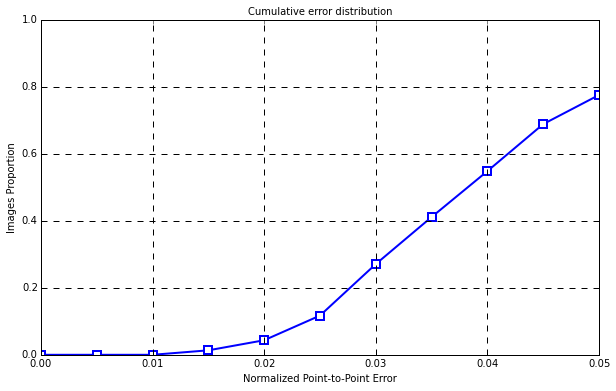

In [46]:
error=[]
for im in fitter_results:
    m=im.fitted_image.landmarks['ground']
    n=im.fitted_image.landmarks['final']
    distance=compute_error_custom_part(m,n)
    error.append(distance)
plot_ced(error)

In [47]:
print("               |  mean  | median |  std  ")

print("Fitting result | {:1.4f} | {:1.4f} | {:1.4f}".format(np.mean(error), 
                                                            np.median(error),
                                                            np.std(error)))

               |  mean  | median |  std  
Fitting result | 0.0421 | 0.0378 | 0.0207


right arm
training = 300
testing = 300
algorithm_cls = SIC  #BSC
n_shape = [70, 90]; 
n_appearance = [190, 200]
sampling_step = 1
noise_std = None
max_iters = 60
prior = False

patch_shape = (24, 24)
features = fast_dsift
diagonal = 150
normalize_parts = no_op
scales = (1, .7)
max_shape_components = 90
max_appearance_components = 200

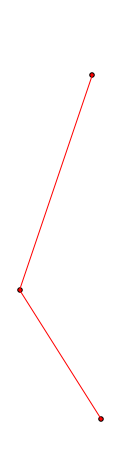

In [16]:
aam = pickle_load(save_path + 'PartsAAM_fast_dsiftright_armFashionPose.pickle')
visualize_shape_model(aam.shape_models)
                 

In [ ]:
aam.shape_models[1].plot_eigenvalues_ratio_widget()

In [48]:
fitter_results=pickle_load(save_path+ 'PartsAAM_fast_dsift_noiseNoneright_armFittedFashionPose.pickle')

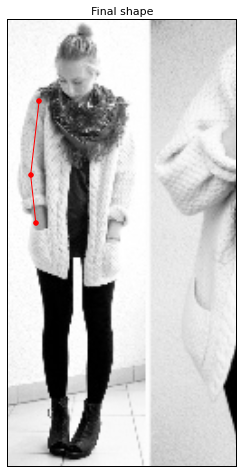

In [49]:
visualize_fitting_result(fitter_results)

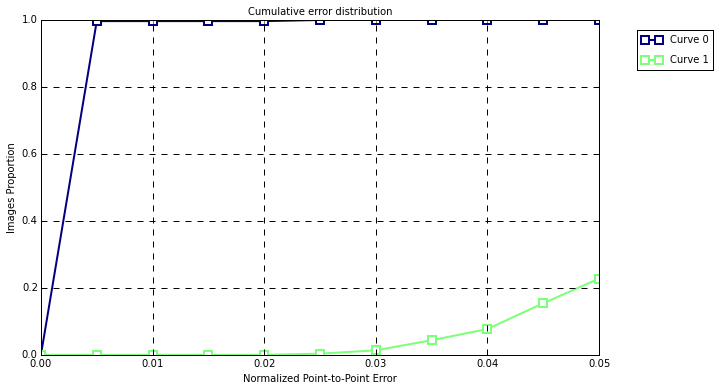

In [50]:
error_type = 'me_norm' #'me_norm', or 'me' or 'rmse'

initial_errors = [fr.initial_error(error_type=error_type) for fr in fitter_results]
final_errors = [fr.final_error(error_type=error_type) for fr in fitter_results]

plot_ced([initial_errors, final_errors])

In [51]:
print("               |  mean  | median |  std  ")
print("Initialization | {:1.4f} | {:1.4f} | {:1.4f}".format(np.mean(initial_errors), 
                                                            np.median(initial_errors),
                                                            np.std(initial_errors)))
print("Fitting result | {:1.4f} | {:1.4f} | {:1.4f}".format(np.mean(final_errors), 
                                                            np.median(final_errors),
                                                            np.std(final_errors)))

               |  mean  | median |  std  
Initialization | 0.0024 | 0.0023 | 0.0013
Fitting result | 0.0783 | 0.0644 | 0.1062


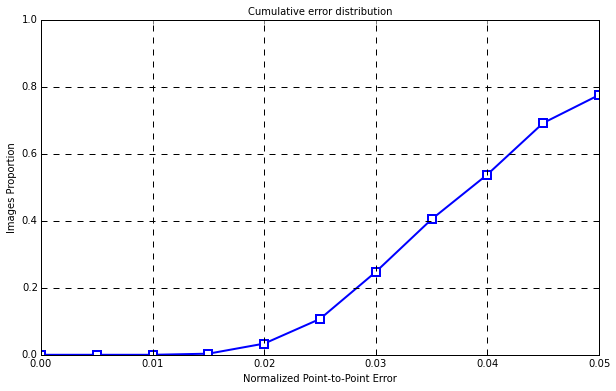

In [52]:
error=[]
for im in fitter_results:
    m=im.fitted_image.landmarks['ground']
    n=im.fitted_image.landmarks['final']
    distance=compute_error_custom_part(m,n)
    error.append(distance)
plot_ced(error)

In [53]:
print("               |  mean  | median |  std  ")

print("Fitting result | {:1.4f} | {:1.4f} | {:1.4f}".format(np.mean(error), 
                                                            np.median(error),
                                                            np.std(error)))

               |  mean  | median |  std  
Fitting result | 0.0481 | 0.0389 | 0.0726
